In [2]:
import numpy as np
import matplotlib.pyplot as plt

from cvxopt import matrix, solvers

### Minimum Fuel Optimal Control

Рассмотрим линеную динамическую систему, состояние которой в момент времени $t$ описывается вектором $\mathbf{x}(t) \in \mathbb{R}^n, t = 0,..,N$ и зависит как от предыдущего состояния, так и от значения входного (управляющего) сигнала $u(t) \in \mathbb{R}, t = 0,...,N-1$:

$$ \mathbf{x}(t+1) = \mathbf{A}\mathbf{x}(t) + \mathbf{b}u(t)$$

где $\mathbf{A} \in \mathbb{R}^{n times n}$ и $b \in \mathbb{R}^n$ заданы и определяют параметры системы.

Задача заключается поиске такого управляющего сигнала $u(0), ..., u(N-1)$, чтобы минимизировать количество потребленного топлива:

$$ F = \sum_{t=0}^{N-1} f(u(t))$$

при условии, что $\mathbf{x}(N) = \mathbf{x}_{des}$. Здесь $\mathbf{x}_{des}$ обозначает желаемое состояние системы на горизонте планирования $N$.
Пусть $\mathbf{x}(0) = \mathbf{0}$, тогда

$x(1) = \mathbf{b}u(0)$

$x(2) = \mathbf{A}\mathbf{b}u(0) + \mathbf{b}u(1)$

$x(3) = \mathbf{A}^2\mathbf{b}u(0) + \mathbf{A}\mathbf{b}u(1) + \mathbf{b}u(2)$

и т.д.

Если обозначить $\mathbf{u}^T = [u(0), u(1), ..., u(N-1)]$, то условие $\mathbf{x}(N) = \mathbf{x}_{des}$ можно записать как 

$$\mathbf{C}\mathbf{u} = \mathbf{x}_{des}$$

где $\mathbf{C}= [\mathbf{A}^{N-1}\mathbf{b}, \mathbf{A}^{N-2}\mathbf{b}, ..., \mathbf{A}\mathbf{b}, \mathbf{b}]$.



Функция $f:\mathbb{R} \rightarrow \mathbb{R}$ определяет количество потраченного топлива в зависимости от амплитуды управляющего сигнала. В этой задаче мы используем:

$$
 f(u) = 
  \begin{cases} 
   |u| & |u| \leq 1\\
   2|u|- 1 & |u| > 1
  \end{cases}
$$

или $f(u) = \max\{u, -u, 2u-1, -2u-1\}$.

https://sites.math.washington.edu/~burke/crs/cvx08/projects/4-16-sasha.pdf

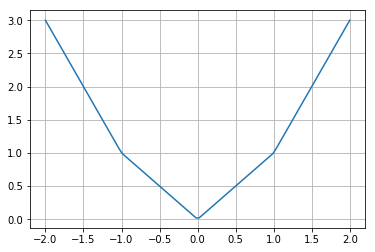

In [3]:
u = np.linspace(-2,2,100)

f = [max(x,-x,2*x-1,-2*x-1) for x in u]
f = np.array(f)

plt.plot(u, f)
plt.grid(True)

In [4]:
theta = np.radians(40) # 5, 40, 50, 80

c, s = np.cos(theta), np.sin(theta)
R = np.array([[c,-s], [s, c]])


y = np.array([1.,0]).reshape((2,1))

x_des = np.array([7.,4]).reshape((2,1))

N = 10 # 5

C = y
for n in range(N-1):
    C = np.c_[R.dot(C), y]
 

In [5]:
# x = [u t]

c = np.r_[np.zeros((N,1)), np.ones((N,1))]

I = np.eye(N)

A = np.block([[I, -I], [-I, -I], [2.*I, -I], [-2.*I, -I]])
b = np.r_[np.zeros((2*N,1)), np.ones((2*N,1))]

G = np.zeros((2, 2*N))
G[:,:N] = C
h = x_des

In [6]:
# objective
c = matrix(c)
# inequalities
A = matrix(A)
b = matrix(b)
# equalities
G = matrix(G)
h = matrix(h)


sol=solvers.lp(c, A, b, G, h, solver='glpk')

solution = np.array(sol['x'])

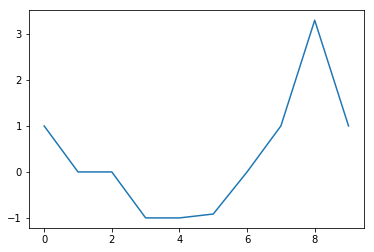

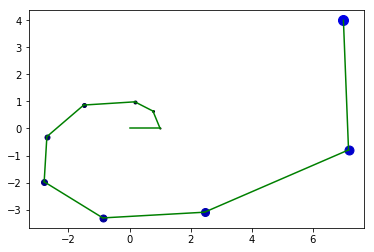

In [7]:
u = solution[:N]

plt.figure()
plt.plot(u)

plt.figure()
x_old = np.zeros((2,1))
for n in range(N):
    x = R.dot(x_old) + u[n]*y
    plt.plot(x[0], x[1], 'o', color=[0.,0.,n/N], markersize=n+1)
    plt.plot([x_old[0], x[0]], [x_old[1], x[1]], color='g')      
    x_old = x
plt.show()

 ## Планирование производственного процесса.

_Определение последовательности работ_ - идентификация и документирование логических связей между работами.

_Сетевой график_ - это динамическая модель производственного процесса, отражающая технологическую зависимость и последовательность выполнения комплекса работ.

### Building a house (Harvard Business Review, 1963)

Для того, чтобы построить дом, необходимо выполнить несколько задач. Каждая задача имеет длительность, задачи могут выполняться одновременно, но некоторые задачи могут быть начаты только после завершения других задач. 

В таблице показана каждая задача, ее продолжительность и задачи, которые должны быть выполнены до ее начала. За какое время можно построить дом?

<img src="https://hbr.org/resources/images/article_assets/hbr/6309/63508_A.gif">

<img src="https://hbr.org/resources/images/article_assets/hbr/6309/63508_B.gif" width = 400>

https://hbr.org/1963/09/the-abcs-of-the-critical-path-method

In [9]:
import string


# this dictionary stores the project durations
dur = [0., 4, 2, 4, 6, 1, 2, 3, 2, 4, 10, 3, 1, 2, 3, 2, 1, 1, 2, 3, 1, 2, 5, 0]

N = len(dur)

# this dictionary stores the projects that a given project depends on (ancestors)
pre = ([], ['a'], ['b'], ['c'], ['d'], ['c'], ['f'], ['f'], ['d'], ['d','g'], ['i','j','h'], ['k'],
    ['l'], ['l'], ['l'], ['e'], ['p'], ['c'], ['o','t'], ['m','n'], ['t'], ['q','r'], ['v'], ['s','u','w'])


In [10]:
tasks = list(string.ascii_lowercase[:-2])
print(tasks)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x']


In [11]:
idx = dict(zip(tasks, range(N)))
print(idx)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23}


In [12]:
pred_dict = dict(zip(tasks, pre))
print(pred_dict)

{'a': [], 'b': ['a'], 'c': ['b'], 'd': ['c'], 'e': ['d'], 'f': ['c'], 'g': ['f'], 'h': ['f'], 'i': ['d'], 'j': ['d', 'g'], 'k': ['i', 'j', 'h'], 'l': ['k'], 'm': ['l'], 'n': ['l'], 'o': ['l'], 'p': ['e'], 'q': ['p'], 'r': ['c'], 's': ['o', 't'], 't': ['m', 'n'], 'u': ['t'], 'v': ['q', 'r'], 'w': ['v'], 'x': ['s', 'u', 'w']}


In [13]:
A = np.zeros((0, N))
b = []

for t in tasks:
    predecessors = pred_dict[t]
    if len(predecessors) > 0: 
        idx_task = idx[t]
        for t_pre in predecessors:
            idx_task_pre = idx[t_pre]
            a = np.zeros((N,))
            a[idx_task] = -1.
            a[idx_task_pre] = 1.
            A = np.r_[A, a.reshape((1,N))]
            b.append(-dur[idx_task_pre])
    
b = np.array(b)

A = np.r_[A, -np.eye(N)]      
b = np.r_[b, np.zeros((N,))]

c = np.zeros((N, 1))
c[-1] = 1

In [14]:
# objective
c = matrix(c)

# inequalities
A = matrix(A)
b = matrix(b)


sol=solvers.lp(c, A, b, solver='glpk')    

times = np.array(sol['x'])

time_total = times[-1] + dur[-1]
print('Time, (days):', time_total)

Time, (days): [34.]
